___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [128]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [129]:
df=pickle.load(open('golden_data_dummy.pkl','rb'))

In [130]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


In [132]:
df.columns

Index(['displacement', 'hp', 'km', 'ss_abs', 'ss_adaptive_cruise_control',
       'ss_adaptive_headlights', 'ss_alarm_system', 'ss_blind_spot_monitor',
       'ss_central_door_lock', 'ss_central_door_lock_with_remote_control',
       ...
       'gearing_type_Semi-automatic', 'fuel_diesel', 'fuel_electric',
       'fuel_gasoline', 'fuel_lpg', 'type_Demonstration',
       'type_Employee's car', 'type_New', 'type_Pre-registered', 'type_Used'],
      dtype='object', length=136)

In [133]:
df.describe()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,...,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000
mean,1432.258843,88.231744,33894.105203,0.949767,0.080187,0.133422,0.126484,0.082188,0.859239,0.155704,...,0.030754,0.471781,0.000133,0.524149,0.003936,0.051634,0.067178,0.054236,0.090127,0.736825
std,271.764876,26.617304,37284.577857,0.218434,0.271591,0.340042,0.332405,0.274660,0.347786,0.362586,...,0.172656,0.499220,0.011550,0.499433,0.062616,0.221295,0.250339,0.226491,0.286373,0.440372
min,890.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1229.000000,66.000000,5000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1461.000000,85.000000,22487.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1598.000000,100.000000,49264.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2967.000000,294.000000,317000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
df.corr()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
displacement,1.000000,0.608069,0.306380,0.039455,0.219180,0.256791,0.075198,0.284346,0.008668,0.011990,...,0.101407,0.647354,-0.004512,-0.643471,-0.027935,-0.036014,-0.002039,-0.089162,-0.104255,0.132912
hp,0.608069,1.000000,0.013735,-0.025535,0.252995,0.331149,0.040451,0.433349,-0.026401,-0.048050,...,0.094190,0.111304,0.009755,-0.107138,-0.034652,0.111306,-0.016734,0.067898,-0.036446,-0.057641
km,0.306380,0.013735,1.000000,0.003092,0.046383,0.007789,0.106760,-0.018739,-0.015460,0.077596,...,0.032341,0.428175,0.002026,-0.433719,0.045312,-0.180433,-0.100492,-0.217220,-0.280735,0.442080
ss_abs,0.039455,-0.025535,0.003092,1.000000,0.043162,0.040839,-0.031936,0.046580,0.248538,0.070964,...,-0.042177,0.019120,-0.023786,-0.020374,0.014457,0.013637,0.021455,0.005178,0.030786,-0.041733
ss_adaptive_cruise_control,0.219180,0.252995,0.046383,0.043162,1.000000,0.202003,0.255668,0.316794,0.037572,0.104905,...,0.239071,0.092960,0.017857,-0.102319,0.071671,0.048770,0.031647,-0.020815,-0.008863,-0.026030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
type_Demonstration,-0.036014,0.111306,-0.180433,0.013637,0.048770,0.043205,-0.058861,0.106895,0.031162,-0.052810,...,-0.025849,-0.123895,-0.002695,0.125743,-0.014668,1.000000,-0.062618,-0.055877,-0.073438,-0.390428
type_Employee's car,-0.002039,-0.016734,-0.100492,0.021455,0.031647,0.022449,-0.017133,0.013814,0.051146,-0.007933,...,-0.018475,0.003158,-0.003100,-0.002038,-0.008357,-0.062618,1.000000,-0.064264,-0.084460,-0.449029
type_New,-0.089162,0.067898,-0.217220,0.005178,-0.020815,0.028177,-0.024663,0.051672,0.003759,-0.055720,...,-0.017066,-0.163772,-0.002766,0.164474,-0.005645,-0.055877,-0.064264,1.000000,-0.075368,-0.400694
type_Pre-registered,-0.104255,-0.036446,-0.280735,0.030786,-0.008863,-0.019357,-0.019540,0.027960,0.066428,-0.018862,...,-0.033124,-0.137841,-0.003636,0.136149,0.013701,-0.073438,-0.084460,-0.075368,1.000000,-0.526618


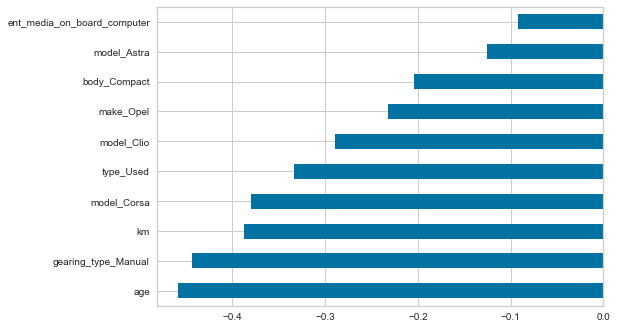

In [135]:
df.corr()["price"].sort_values().head(10).plot.barh()

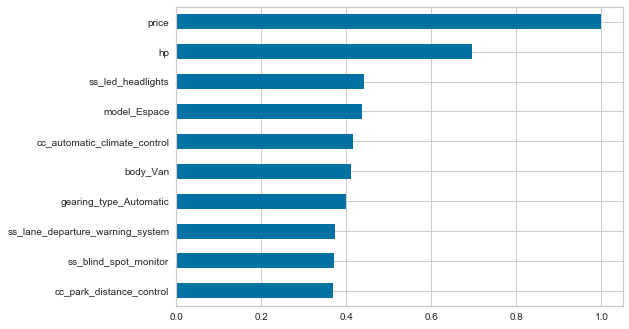

In [136]:
df.corr()["price"].sort_values().tail(10).plot.barh()

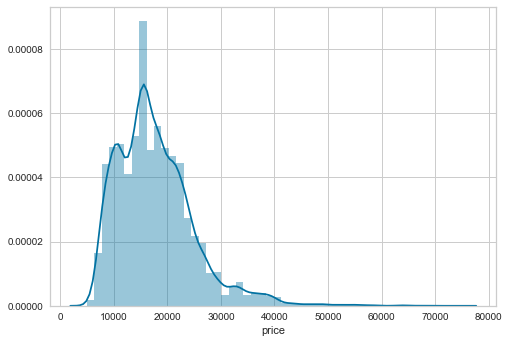

In [137]:
sns.distplot(df.price)

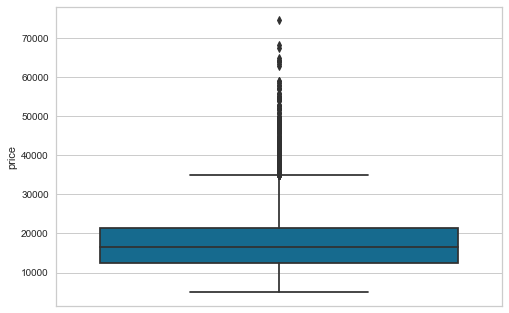

In [138]:
sns.boxplot(df.price, orient="v")

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [139]:
X = df.drop(['price'], axis=1)
y= df['price']

In [140]:
y

0        15770
1        14500
2        14640
3        14500
4        16790
         ...  
15913    39950
15915    39885
15916    39875
15917    39700
15918    40999
Name: price, Length: 14990, dtype: int64

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
X_train

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
11428,1598.000000,100.0,36354,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
10377,1229.000000,51.0,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,1,0,0
9020,1333.395989,51.0,133081,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
6908,1598.000000,81.0,59800,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
12791,1598.000000,147.0,5990,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,1498.000000,110.0,10,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,1,0
14231,1461.000000,55.0,18500,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,0,0,0,0,0,0,0,1
5742,1598.000000,100.0,91600,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
863,999.000000,71.0,9392,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [144]:
X.shape

(14990, 135)

In [145]:
X_train.shape

(11992, 135)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [146]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [147]:
from sklearn.linear_model import LinearRegression

In [148]:
model= LinearRegression()

In [149]:
model.fit(X_train, y_train)

LinearRegression()

In [150]:
print(model.score(X,y)*100) 

89.12656618568519


In [151]:
print(model.intercept_) # when x = 0 , y = intercept

12863.60208058749


In [152]:
print(model.coef_)

[-1.07324683e+00  1.00166983e+02 -3.66043273e-02 -4.31072316e+01
 -2.11696074e+01  2.90467232e+02  1.47113286e+02 -4.26342916e+02
 -2.45857390e+02  1.44234756e+01 -2.93066855e+02 -1.16108907e+01
 -1.62343964e+02 -2.49233364e+02  3.14435352e+01 -8.25700143e+02
 -1.68410690e+02 -6.39788701e+01 -2.52627947e+02 -3.36816275e+02
 -2.21937795e+02  6.50316165e+02  7.88768070e+02  5.31963200e+02
  5.00522695e+02 -4.61395475e+02 -5.70148532e+02  1.39061715e+02
  1.34225323e+02  2.11425107e+02  1.86571437e+01 -4.13212783e+02
  1.22899206e+02 -1.10716807e+02 -1.60110802e+03 -5.85909249e+02
  1.44819775e+02  9.04394102e+02 -7.91700474e+01 -8.95007277e+01
  7.50148324e+00  3.55613012e+02 -1.90184859e+02 -1.39196020e+03
 -1.95752826e+02  3.11567861e+02  3.60531806e+01 -8.14980053e+01
  3.51648412e+02  3.35134852e+02 -4.18921989e+01  2.67668171e+02
 -2.30397964e+02  8.10384207e+01  2.22257768e-11  4.97830368e+01
  1.62236253e+02  2.96949578e+02  6.46863104e+02  2.33634542e+03
  3.34576206e+02  2.60053

In [153]:
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficent'])
coef_df

,Coefficent
displacement,-1.073247
hp,100.166983
km,-0.036604
ss_abs,-43.107232
ss_adaptive_cruise_control,-21.169607
...,...
type_Demonstration,1787.860124
type_Employee's car,-1140.320012
type_New,936.704115
type_Pre-registered,-524.506129


In [154]:
y_pred = model.predict(X_test)

In [155]:
eval_metrics(y_test, y_pred) 

r2_score: 0.8917673810997107 
 mae: 1672.3867626671927 
 mse: 5481554.524311709 
 rmse: 2341.2719885377924


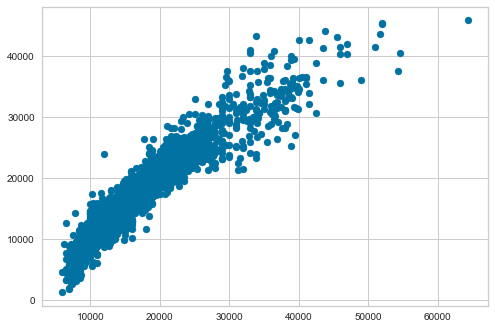

In [156]:
plt.scatter(y_test,y_pred)

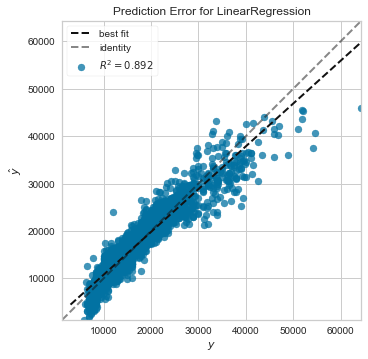

In [157]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

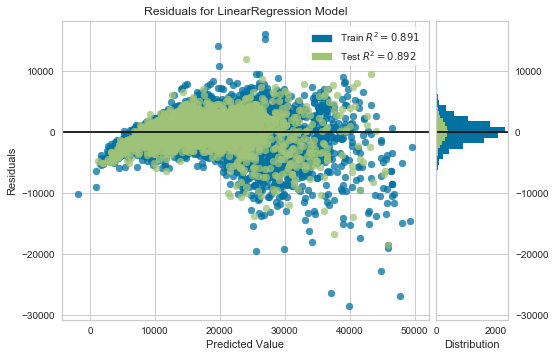

In [158]:
# Yellowbrick Residual Plot
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [159]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [160]:
compare.sample(10)

,Actual,Pred
5652,25487,24646.147179
911,21490,18700.278982
7291,15400,15867.763781
2548,22329,22120.484812
2683,18376,17846.767350
8515,11290,11865.613158
5150,26488,28508.259718
9506,9790,11026.049286
10722,15900,16158.322848
4636,23200,22946.430377


In [161]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=5)
cv_scores.mean()

0.8853675809888795

In [162]:
cv_scores

array([0.88213508, 0.88024083, 0.89031947, 0.88202718, 0.89211535])

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [173]:
scaler = StandardScaler()

In [174]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [175]:
scaled_X_train

array([[ 0.61233354,  0.43527192,  0.06815014, ..., -0.23919846,
        -0.31331853,  0.5964849 ],
       [-0.74581652, -1.39409074, -0.91054832, ...,  4.18062889,
        -0.31331853, -1.67648838],
       [-0.36157419, -1.39409074,  2.67252897, ..., -0.23919846,
        -0.31331853,  0.5964849 ],
       ...,
       [ 0.61233354,  0.43527192,  1.55565118, ..., -0.23919846,
        -0.31331853,  0.5964849 ],
       [-1.59235991, -0.6474121 , -0.65780292, ..., -0.23919846,
        -0.31331853,  0.5964849 ],
       [-0.12011053,  0.80861124, -0.90987519, ...,  4.18062889,
        -0.31331853, -1.67648838]])

In [176]:
scaled_X_test

array([[ 0.61233354,  0.43527192,  1.4673101 , ..., -0.23919846,
        -0.31331853,  0.5964849 ],
       [-0.12379115, -0.83408176, -0.45295718, ..., -0.23919846,
        -0.31331853,  0.5964849 ],
       [-1.59604054, -0.83408176, -0.9104137 , ...,  4.18062889,
        -0.31331853, -1.67648838],
       ...,
       [ 0.61233354,  0.43527192,  1.48564606, ..., -0.23919846,
        -0.31331853,  0.5964849 ],
       [ 0.61233354, -0.27407278,  0.04782173, ..., -0.23919846,
        -0.31331853,  0.5964849 ],
       [ 0.61233354,  0.43527192, -0.19716925, ..., -0.23919846,
        -0.31331853,  0.5964849 ]])

In [177]:
ridge_model = Ridge()

In [178]:
ridge_model.fit(scaled_X_train, y_train)
y_pred = ridge_model.predict(scaled_X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8917706743853209 
 mae: 1672.3506966317725 
 mse: 5481387.7324072 
 rmse: 2341.2363683334497


In [179]:
y_pred

array([16394.34115383, 11025.69248666, 18024.6786438 , ...,
       15803.62616282, 21547.39002377, 15866.98311062])

In [185]:
alpha_space = np.linspace(0.1,20,50)
ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)
print('Best alpha:', ridgecv.alpha_)

Best alpha: 14.314285714285713


In [187]:
# train the ridge model again with best alpha
ridge_model = Ridge(14.3).fit(scaled_X_train, y_train)

In [188]:
accuraries = cross_val_score(estimator=ridge_model, X=scaled_X_train, y=y_train, cv=10)
accuraries.mean()

0.8857315504248773

In [189]:
accuraries

array([0.89932847, 0.8662584 , 0.88214954, 0.87958522, 0.89534823,
       0.88714207, 0.87822611, 0.88534289, 0.89971362, 0.88422096])

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


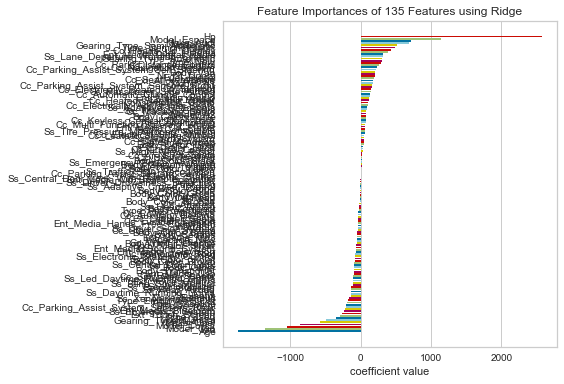

In [60]:
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [61]:
ridge_model.coef_

array([-2.07644261e+02,  2.57918207e+03, -1.35352447e+03, -1.32569951e+01,
       -4.39676306e+00,  9.64515745e+01,  4.85712667e+01, -1.12989371e+02,
       -8.67904692e+01, -5.50061374e-01, -1.34099346e+02, -3.08685303e+00,
       -3.88027750e+01, -7.54116589e+01,  1.49872542e+01, -2.39246429e+02,
       -9.10825909e+01, -2.20057404e+01, -1.14622075e+02, -1.35880760e+02,
       -1.08542596e+02,  2.66569682e+02,  3.11592059e+02,  3.56620402e+01,
        1.44966218e+02, -1.30010200e+02, -1.31075082e+02,  4.43014029e+01,
        5.81034589e+01,  9.22502123e+01,  6.36178727e+00, -1.64417957e+02,
        1.10572334e+02, -4.95893304e+01, -1.74520812e+03, -2.28519432e+02,
        6.20256677e+01,  3.18172943e+02, -3.70846296e+01, -4.66796828e+01,
       -2.16020236e+00,  1.31544324e+02, -6.64352133e+01, -6.67685889e+01,
       -9.75450012e+01,  2.05114590e+02,  2.47032588e+01, -3.72256575e+01,
        7.12614466e+01,  2.11533630e+01, -1.57837350e+01,  1.39238695e+02,
       -3.08385027e+01,  

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [190]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [191]:
lasso_model = Lasso()
lasso_model.fit(scaled_X_train, y_train)
y_pred = lasso_model.predict(scaled_X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8918027015894271 
 mae: 1671.7490373421224 
 mse: 5479765.681057495 
 rmse: 2340.889933563194


In [192]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lasso_model, X=scaled_X_train, y=y_train, cv=10)
cv_scores.mean()

0.8858013957087116

In [193]:
cv_scores = cross_val_score(estimator=lasso_model, X=scaled_X_train, y=y_train, scoring = "neg_mean_squared_error", cv=10)
np.sqrt(-cv_scores.mean())

2456.2300368847987

In [194]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5).fit(scaled_X_train, y_train)

In [195]:
lasso_cv_model.alpha_

7.410204081632653

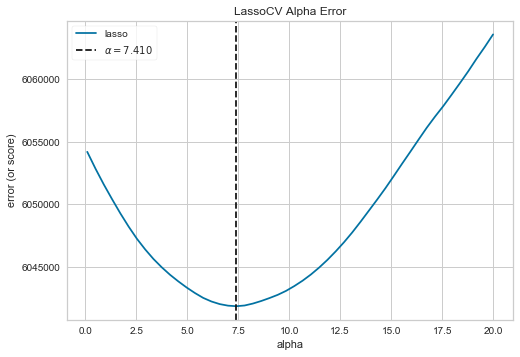

In [196]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 50)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(scaled_X_train, y_train)
visualizer.show()

In [197]:
lasso_model = Lasso(7.4).fit(scaled_X_train, y_train)
y_pred = lasso_model.predict(scaled_X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8918865409993066 
 mae: 1668.537795150112 
 mse: 5475519.546193433 
 rmse: 2339.982808952543


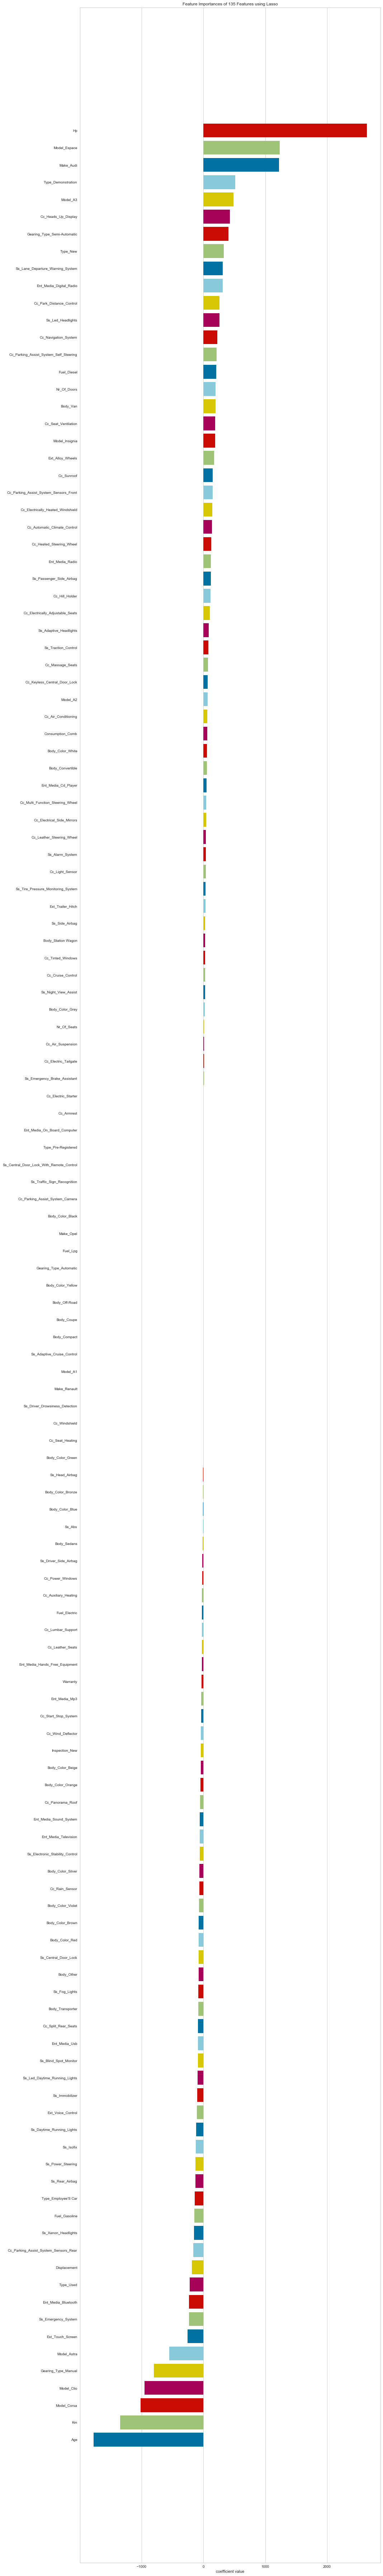

In [198]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))

# Fit and show the feature importances
viz.fit(scaled_X_train, y_train)
viz.show()

In [199]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

114

In [200]:
X_new=X[significant_features.features]

In [201]:
X_new.shape

(14990, 114)

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [203]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [204]:
y_pred = lm.predict(X_test)

In [205]:
eval_metrics(y_test, y_pred)

r2_score: 0.8844207326878387 
 mae: 1676.543604557354 
 mse: 5837961.659470933 
 rmse: 2416.1874222565875


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___